## Import modules

In [1]:
# mount Gdrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip install --quiet scvi-colab
from scvi_colab import install
install()

!pip install session_info

     |████████████████████████████████| 237 kB 15.1 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 
INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=5621b4bbd2dc2427a95ee39b1cfe8bef2cdb1fd65a54d144dc09c1b2835d03ba
  Stored in directory: /root/.cache/pip/wheels/5c/1b/4d/111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [3]:
import anndata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
import scvi

import session_info
session_info.show()

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

## Run scVI: SAN-aCM

AnnData object with n_obs × n_vars = 9857 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    obsm: 'X_scArches'
[ 1.  1.  1.  1.  2. 11.  1.  4.  1.  1.]
A61_Nuclei_Multiome-v1     3841
AH1_Nuclei_Multiome-v1     2220
AV14_

Anndata setup with scvi-tools version 0.19.0.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'batch_key',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   7   │
│         n_cells          │ 9857  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   3   │
│         n_labels         │   1   │
│          n_vars          │ 26710 │
└──────────────────────────┴───────┘

                            Data Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Registry Key      ┃            scvi-tools Location            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X           │                  adata.X                  │
│         batch         │         adata.obs['_scvi_batch']          │
│ extra_continuous_covs │ adata.obsm['_scvi_extra_continuous_covs'] │
│        labels         │         adata.obs['_scvi_labels']         │
└───────────────────────┴───────────────────────────────────────────┘

                           batch State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1  │          0          │
│                        │ AH1_Nuclei_Multiome-v1  │          1          │
│                        │ AH2_Nuclei_Multiome-v1  │          2          │
│                        │ AV3_Nuclei_Multiome-v1  │          3          │
│                        │ AV10_Nuclei_Multiome-v1 │          4          │
│                        │ AV13_Nuclei_Multiome-v1 │          5          │
│                        │ AV14_Nuclei_Multiome-v1 │          6          │
└────────────────────────┴─────────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

  extra_continuous_covs State   
            Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │
│  adata.obs['pct_counts_mt']  │
│ adata.obs['pct_counts_ribo'] │
└──────────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [12:41<00:00,  1.86s/it, loss=8.54e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [12:41<00:00,  1.90s/it, loss=8.54e+03, v_num=1]


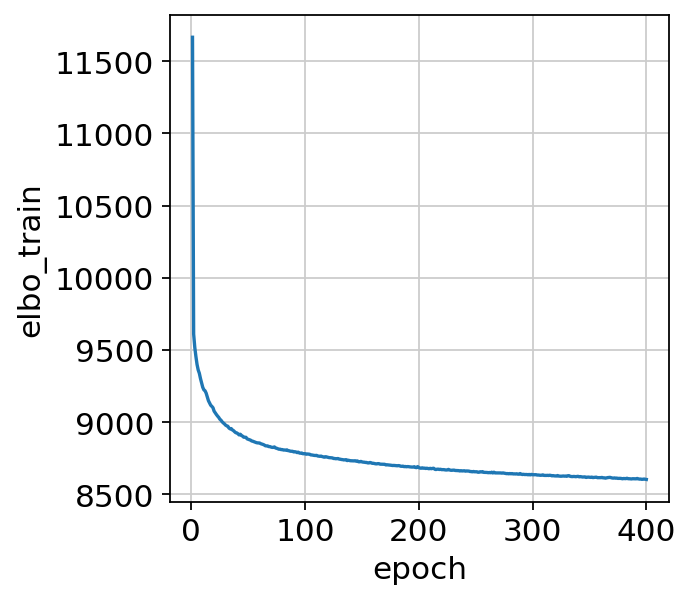

<Figure size 320x320 with 0 Axes>

In [5]:
adata = sc.read_h5ad('/content/gdrive/My Drive/Colab/data/anndata/RNA_adult_full_raw_SAN-aCM.h5ad')
print(adata)
print(adata.X.data[:10])
print(adata.obs['batch_key'].value_counts())

# filter genes
sc.pp.filter_genes(adata, min_cells=3)
print(adata.shape)

# setup anndata for scVI
scvi.model.SCVI.setup_anndata(adata, 
                          # layer="counts", 
                          batch_key="batch_key",
                          continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])

# Creating and training a model
vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
vae.view_anndata_setup(adata)

# train
vae.train()

# save scvi model
vae.save(f'/content/gdrive/My Drive/Colab/data/scVI/models/RNA_adult_full_raw_SAN-aCM/',overwrite=True)

# Convergence plot
x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
plt.plot(x, vae.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()
plt.clf()

# add the latent space to adata
adata.obsm["X_scVI"] = vae.get_latent_representation()

# save post-scVI data
adata.write(f'/content/gdrive/My Drive/Colab/data/scVI/RNA_adult_full_raw_SAN-aCM_post-scVI.h5ad')

In [6]:
del adata, vae

## Run scVI: AVN-avCM

AnnData object with n_obs × n_vars = 15618 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    obsm: 'X_scArches'
[10. 20. 15. 23.  4. 34. 30. 45.  5. 38.]
A61_Nuclei_Multiome-v1     11241
AV13_Nuclei_Multiome-v1     2718
AH

Anndata setup with scvi-tools version 0.19.0.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'batch_key',
│   'labels_key': None,
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   4   │
│         n_cells          │ 15618 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   3   │
│         n_labels         │   1   │
│          n_vars          │ 26624 │
└──────────────────────────┴───────┘

                            Data Registry                            
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃     Registry Key      ┃            scvi-tools Location            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X           │                  adata.X                  │
│         batch         │         adata.obs['_scvi_batch']          │
│ extra_continuous_covs │ adata.obsm['_scvi_extra_continuous_covs'] │
│        labels         │         adata.obs['_scvi_labels']         │
└───────────────────────┴───────────────────────────────────────────┘

                           batch State Registry                           
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location     ┃       Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch_key'] │ A61_Nuclei_Multiome-v1  │          0          │
│                        │ AH1_Nuclei_Multiome-v1  │          1          │
│                        │ AH2_Nuclei_Multiome-v1  │          2          │
│                        │ AV13_Nuclei_Multiome-v1 │          3          │
└────────────────────────┴─────────────────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

  extra_continuous_covs State   
            Registry            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  adata.obs['total_counts']   │
│  adata.obs['pct_counts_mt']  │
│ adata.obs['pct_counts_ribo'] │
└──────────────────────────────┘

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [20:25<00:00,  3.03s/it, loss=7.57e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [20:25<00:00,  3.06s/it, loss=7.57e+03, v_num=1]


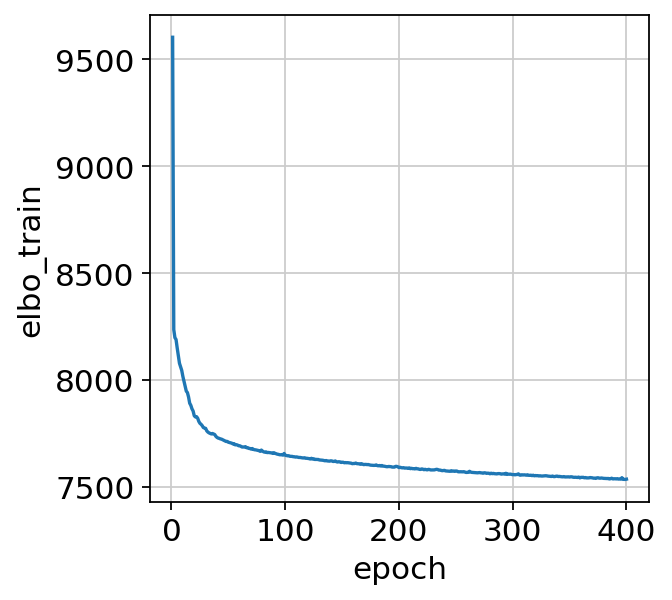

<Figure size 320x320 with 0 Axes>

In [7]:
adata = sc.read_h5ad('/content/gdrive/My Drive/Colab/data/anndata/RNA_adult_full_raw_AVN-avCM.h5ad')
print(adata)
print(adata.X.data[:10])
print(adata.obs['batch_key'].value_counts())

# filter genes
sc.pp.filter_genes(adata, min_cells=3)
print(adata.shape)

# setup anndata for scVI
scvi.model.SCVI.setup_anndata(adata, 
                          # layer="counts", 
                          batch_key="batch_key",
                          continuous_covariate_keys=['total_counts','pct_counts_mt','pct_counts_ribo'])

# Creating and training a model
vae = scvi.model.SCVI(adata, n_hidden = 128, n_latent = 50, n_layers = 3, dispersion = 'gene-batch')
vae.view_anndata_setup(adata)

# train
vae.train()

# save scvi model
vae.save(f'/content/gdrive/My Drive/Colab/data/scVI/models/RNA_adult_full_raw_AVN-avCM/',overwrite=True)

# Convergence plot
x = np.linspace(1, (len(vae.history['elbo_train'])), (len(vae.history['elbo_train'])))
plt.plot(x, vae.history['elbo_train'], label="train")
plt.xlabel('epoch')
plt.ylabel('elbo_train')
plt.show()
plt.clf()

# add the latent space to adata
adata.obsm["X_scVI"] = vae.get_latent_representation()

# save post-scVI data
adata.write(f'/content/gdrive/My Drive/Colab/data/scVI/RNA_adult_full_raw_AVN-avCM_post-scVI.h5ad')